In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [2]:
np.random.seed(0)

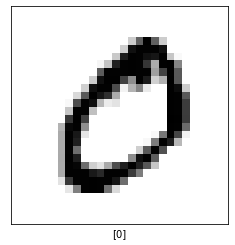

In [3]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [4]:
# Training data will have to be converted to 32 bit floats. 
# We divide it by 255 as its the highest number represented before conversion and the resulting value is between 0.0 to 1.0
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [5]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network

# Creating a layer with 64 kernels with a size of 2X2. Each kernel moves accorss the text image by 1 and the output being same size of input. Relu function is used
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) # Max-Pooling operation is called and downscaling by a factor of 2 is done 
model.add(tf.keras.layers.Dropout(0.3)) # Using dropout layers to prevent overfitting of the model

# Adding another layer with certain parameters

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation=keras.layers.LeakyReLU(alpha=0.02)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

# Flattening the input 
model.add(tf.keras.layers.Flatten())

# we have 10 classes in our dataset and two dense layers of 260 and 10 as its dimensions can be used  
model.add(tf.keras.layers.Dense(260, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# To get the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [6]:
# compiling...
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [7]:
#Reshape for CNN
x_train = x_train.reshape(-1,28, 28,1) 
x_test = x_test.reshape(-1,28, 28, 1)


In [8]:
# training the model with batch size of 70 and 11 epochs

model_log=model.fit(x_train, y_train,
          batch_size=70,
          epochs=11,
          verbose=1,
          validation_split=.3)


Epoch 1/11
600/600 [==============================] - 102s 162ms/step - loss: 0.3760 - accuracy: 0.8799 - val_loss: 0.1017 - val_accuracy: 0.9697
Epoch 2/11
600/600 [==============================] - 76s 127ms/step - loss: 0.1345 - accuracy: 0.9577 - val_loss: 0.0731 - val_accuracy: 0.9777
Epoch 3/11
600/600 [==============================] - 76s 127ms/step - loss: 0.0987 - accuracy: 0.9691 - val_loss: 0.0565 - val_accuracy: 0.9824
Epoch 4/11
600/600 [==============================] - 90s 149ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.0507 - val_accuracy: 0.9837
Epoch 5/11
600/600 [==============================] - 98s 164ms/step - loss: 0.0748 - accuracy: 0.9758 - val_loss: 0.0466 - val_accuracy: 0.9849
Epoch 6/11
600/600 [==============================] - 82s 137ms/step - loss: 0.0651 - accuracy: 0.9794 - val_loss: 0.0427 - val_accuracy: 0.9863
Epoch 7/11
600/600 [==============================] - 82s 136ms/step - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.0421 - val_a

In [9]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0351 - accuracy: 0.9897

 Test accuracy: 0.9897000193595886


The accuracy of the model is pretty high which is undesirable as it might overfit the model. But in this case we will be testing it against one of the images from the dataset so it wont matter much.

In [10]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 4s 14ms/step


array([3.4073043e-11, 2.3708445e-08, 3.2164277e-08, 6.7122471e-08,
       9.0894375e-11, 1.3659175e-11, 2.0843609e-15, 9.9999958e-01,
       1.6247589e-10, 2.0986309e-07], dtype=float32)

In [11]:
np.argmax(predictions[0])

7

In [12]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

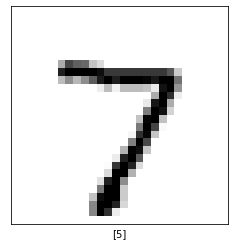

In [13]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


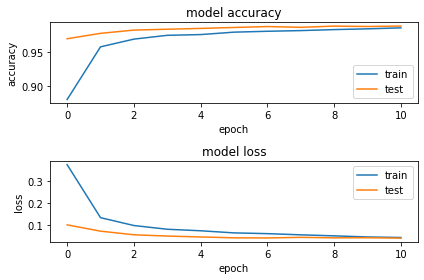

In [14]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

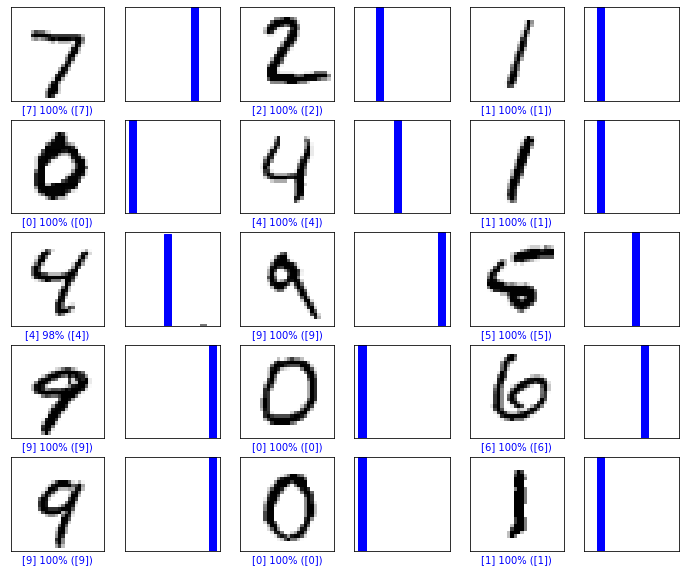

In [16]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

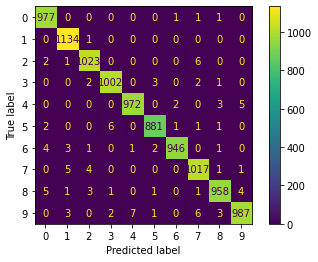

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, np.argmax(predictions,axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0,1,2,3,4,5,6,7,8,9])

cm_display.plot()
plt.show()